In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [5]:
url="weather_2012.csv"
weather = pd.read_csv(url)
weather.head(n=10)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,2012-01-01 09:00:00,-1.3,-3.1,88,15,4.0,101.20,Fog


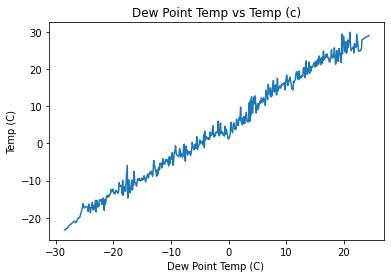

In [6]:
weather.groupby("Dew Point Temp (C)")["Temp (C)"].median().plot() #directly proportional
plt.xlabel("Dew Point Temp (C) ")
plt.ylabel("Temp (C)")
plt.title("Dew Point Temp vs Temp (c)")
plt.show()

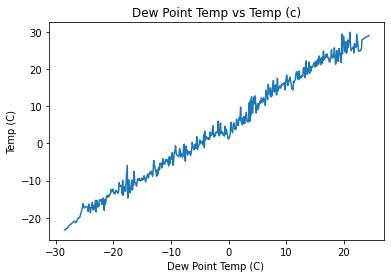

In [7]:
weather.groupby("Dew Point Temp (C)")["Temp (C)"].median().plot() #directly proportional
plt.xlabel("Dew Point Temp (C) ")
plt.ylabel("Temp (C)")
plt.title("Dew Point Temp vs Temp (c)")
plt.show()

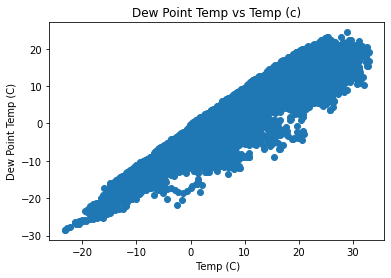

In [53]:
plt.scatter(x=weather["Temp (C)"],y=weather["Dew Point Temp (C)"]) #directly proportional
plt.xlabel(" Temp (C)")
plt.ylabel("Dew Point Temp (C)")
plt.title("Dew Point Temp vs Temp (c)")
plt.show()

# splitting 

In [16]:
df2=weather.copy
df2

<bound method NDFrame.copy of                 Date/Time  Temp (C)  Dew Point Temp (C)  Rel Hum (%)  \
0     2012-01-01 00:00:00      -1.8                -3.9           86   
1     2012-01-01 01:00:00      -1.8                -3.7           87   
2     2012-01-01 02:00:00      -1.8                -3.4           89   
3     2012-01-01 03:00:00      -1.5                -3.2           88   
4     2012-01-01 04:00:00      -1.5                -3.3           88   
...                   ...       ...                 ...          ...   
8779  2012-12-31 19:00:00       0.1                -2.7           81   
8780  2012-12-31 20:00:00       0.2                -2.4           83   
8781  2012-12-31 21:00:00      -0.5                -1.5           93   
8782  2012-12-31 22:00:00      -0.2                -1.8           89   
8783  2012-12-31 23:00:00       0.0                -2.1           86   

      Wind Spd (km/h)  Visibility (km)  Stn Press (kPa)               Weather  
0                   4    

In [20]:
X=weather.drop(["Dew Point Temp (C)","Date/Time","Rel Hum (%)","Wind Spd (km/h)","Visibility (km)","Stn Press (kPa)","Weather"],axis="columns")
X.shape

(8784, 1)

In [21]:
y=weather.drop(["Temp (C)","Date/Time","Rel Hum (%)","Wind Spd (km/h)","Visibility (km)","Stn Press (kPa)","Weather"],axis="columns")
y.shape

(8784, 1)

In [29]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (7027, 1)
shape of y_train =  (7027, 1)
shape of X_test =  (1757, 1)
shape of y_test =  (1757, 1)


# Model Selection

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [30]:
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
lr.coef_

array([[0.87001858]])

In [32]:
lr.intercept_

array([-5.13608138])

In [34]:
#y=mx+c
m=lr.coef_
c=lr.intercept_
y=m*-1.4+c
y

array([[-6.35410739]])

In [35]:
lr.predict([[0.8]])[0][0].round(2)

-4.44

In [54]:
lr.score(X_test,y_test) #86%

0.8686493144145575

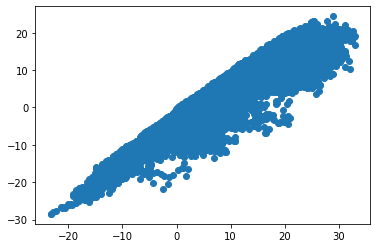

In [37]:
plt.scatter(X_train,y_train)

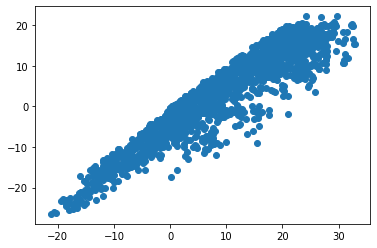

In [38]:
plt.scatter(X_test,y_test)

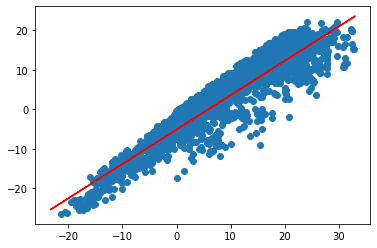

In [56]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

In [49]:
def Dew_point_temp(x):
    print(lr.predict([[x]])[0][0].round(2))
    

In [52]:
Dew_point_temp(8.8)

2.52


In [51]:
weather[weather["Temp (C)"]==10]

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
1612,2012-03-08 04:00:00,10.0,-0.7,47,28,25.0,100.64,Mostly Cloudy
1925,2012-03-21 05:00:00,10.0,8.8,92,0,25.0,102.02,Clear
2246,2012-04-03 14:00:00,10.0,-8.9,25,13,48.3,100.65,Mostly Cloudy
2461,2012-04-12 13:00:00,10.0,-1.0,46,15,48.3,101.40,Mostly Cloudy
2610,2012-04-18 18:00:00,10.0,-5.5,33,7,48.3,101.70,Mainly Clear
2921,2012-05-01 17:00:00,10.0,8.4,90,7,4.0,101.21,"Rain,Fog"
3132,2012-05-10 12:00:00,10.0,5.4,73,30,24.1,99.48,Cloudy
3288,2012-05-17 00:00:00,10.0,2.9,61,24,25.0,100.93,Mostly Cloudy
3844,2012-06-09 04:00:00,10.0,6.9,81,0,25.0,100.60,Mainly Clear
6307,2012-09-19 19:00:00,10.0,2.5,60,4,25.0,101.75,Clear
